## ASSESMENT OF RISKS ASSOCIATED WITH VENTURING INTO AVIATION MARKET

###        1.1  BUSINESS PROBLEM

This project focuses on evaluating different categories of aircraft and selecting the best initial options for the company's entry into the aviation market, specifically targeting airplanes for commercial and private enterprises. It will therefore focus on analysis historical data giving an overview of the risks associated with running aircraft business such as operational risks, mantainance costs based on aircraft damage ,aircraft safety measured by the number of accident incidences.

####           1.1.0 OBJECTIVES
* To determine potential risks associated with aircraft business
* To determine which aircraft are the lowest risk for the company to Venture into.
* To identify the most economical aircraft for recommendation to the management.

#### 1.2 EXPLORATORY DATA ALALYSIS(EDA)
The goal of this project is to help the company make informed decisions on whether to enter into Aviation industry and this can only be achieved by carry out comprehensive analysis of the data given to determine the level of risks associated with this industry. The analysis has therefore employed the use of pandas and various libraries to explore the data.

In [46]:
#Importing the various libraries for purposes of reading the data, statitical /Eploratory data analysis and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [47]:
# Reading 'AviationData.csv' into pandas dataframe with the variable name df
df = pd.read_csv('Data\\AviationData.csv', encoding = 'latin1', low_memory= False)

In [48]:
#cleaning date column - converting it to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
#checking maximum and minimum dates to determine which dates to work with
df = df[df['Event.Date'].dt.year.between(2012, 2022)]

In [49]:
#Getting the first five rows of the data to get a quick synopsis of the data structure in order to dertimine the next cause of action
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
71225,20120102X93914,Accident,ERA12LA131,2012-01-01,"Willimantic, CT",United States,414430N,0721123W,IJD,Windham Airport,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,A partial loss of engine power due to carburet...,25-09-2020
71226,20120103X02043,Accident,CEN12LA120,2012-01-01,"Lohn, TX",United States,311930N,0992430W,NaN,NaN,...,Aerial Observation,SKY HORSE HELICOPTERS INC,0.0,0.0,2.0,0.0,VMC,NaN,The improper installation of the tail rotor ge...,25-09-2020
71227,20111230X02532,Accident,WPR12CA073,2012-01-02,"Eureka, CA",United States,404812N,0124646W,EKA,Murray Field Airport,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,A collision with a deer while landing.,25-09-2020
71228,20120103X35104,Accident,ERA12CA134,2012-01-02,"River Ranch, FL",United States,027543N,0813448W,2RR,River Ranch,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,NaN,The pilots failure to maintain directional co...,25-09-2020
71229,20120103X94513,Accident,ERA12LA132,2012-01-02,"Shelter Island, NY",United States,004140N,0722035W,NaN,Klenawicus Airfield,...,Personal,NORTHEASTERN AVIATION CORP,0.0,0.0,0.0,1.0,VMC,NaN,"A hard landing, which resulted in a failure of...",25-09-2020


In [50]:
#Summary review of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17664 entries, 71225 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                17664 non-null  object        
 1   Investigation.Type      17664 non-null  object        
 2   Accident.Number         17664 non-null  object        
 3   Event.Date              17664 non-null  datetime64[ns]
 4   Location                17664 non-null  object        
 5   Country                 17664 non-null  object        
 6   Latitude                15571 non-null  object        
 7   Longitude               15571 non-null  object        
 8   Airport.Code            10523 non-null  object        
 9   Airport.Name            10486 non-null  object        
 10  Injury.Severity         16815 non-null  object        
 11  Aircraft.damage         16437 non-null  object        
 12  Aircraft.Category       17349 non-null  object 

Summary Information on the dataFrame indicates the is data cleaning that needs to be done, from the above output, the data type for Accidents.Number has been returned as n object and not an interger and yet it takes the form of discrete data.

In [51]:
df.shape

(17664, 31)

In [52]:
# To determine the possible outliers in the dataframe- Values that don't fit with the pattern of the data
category_counts = df['Aircraft.Category'].value_counts()
print(category_counts)

Aircraft.Category
Airplane             14749
Helicopter            1936
Glider                 247
Balloon                116
Gyrocraft              109
Weight-Shift            97
Powered Parachute       54
Ultralight              14
Unknown                 12
WSFT                     9
UNK                      2
Rocket                   1
Powered-Lift             1
Blimp                    1
ULTR                     1
Name: count, dtype: int64


The aircraft Category has one that is unknown which is a clear indicator of a data point that significantly differ from the rest.

In [53]:
Accident_counts = df['Accident.Number'].value_counts()
print(Accident_counts)

Accident.Number
WPR23LA045    2
DCA22WA167    2
CEN23MA034    2
DCA22LA135    2
DCA22WA158    2
             ..
GAA15CA218    1
ERA15WA303    1
OPS15IA020    1
CEN15LA359    1
ERA23LA097    1
Name: count, Length: 17638, dtype: int64


In [54]:
damage_counts = df['Aircraft.damage'].value_counts()
print(damage_counts)

Aircraft.damage
Substantial    13497
Destroyed       2231
Minor            590
Unknown          119
Name: count, dtype: int64


In [55]:
Engine_counts = df['Number.of.Engines'].value_counts()
print(Engine_counts)

Number.of.Engines
1.0    12439
2.0     1851
0.0      178
4.0       44
3.0       11
8.0        3
6.0        1
Name: count, dtype: int64


In [56]:
#To identify any missing values in the dataframe
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                   2093
Longitude                  2093
Airport.Code               7141
Airport.Name               7178
Injury.Severity             849
Aircraft.damage            1227
Aircraft.Category           315
Registration.Number          10
Make                         15
Model                        20
Amateur.Built                 0
Number.of.Engines          3137
Engine.Type                4855
FAR.Description             707
Schedule                  15924
Purpose.of.flight          3534
Air.carrier                9158
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3389
Broad.phase.of.flight     17664
Report.Status              5681
Publication.Date           1013
dtype: i

In [57]:
#Using value counts for categorical columns which are important in arriving at the conclusion to determine unique values
df['Aircraft.Category'].value_counts(dropna=False)

Aircraft.Category
Airplane             14749
Helicopter            1936
NaN                    315
Glider                 247
Balloon                116
Gyrocraft              109
Weight-Shift            97
Powered Parachute       54
Ultralight              14
Unknown                 12
WSFT                     9
UNK                      2
Rocket                   1
Powered-Lift             1
Blimp                    1
ULTR                     1
Name: count, dtype: int64

In [58]:
# To identify how many different data types are in a column.
df.apply(type).value_counts()


<class 'pandas.core.series.Series'>    31
Name: count, dtype: int64

In [59]:
# Check column names with their positions
for i, col in enumerate(df.columns):
    print(i, col)

0 Event.Id
1 Investigation.Type
2 Accident.Number
3 Event.Date
4 Location
5 Country
6 Latitude
7 Longitude
8 Airport.Code
9 Airport.Name
10 Injury.Severity
11 Aircraft.damage
12 Aircraft.Category
13 Registration.Number
14 Make
15 Model
16 Amateur.Built
17 Number.of.Engines
18 Engine.Type
19 FAR.Description
20 Schedule
21 Purpose.of.flight
22 Air.carrier
23 Total.Fatal.Injuries
24 Total.Serious.Injuries
25 Total.Minor.Injuries
26 Total.Uninjured
27 Weather.Condition
28 Broad.phase.of.flight
29 Report.Status
30 Publication.Date


In [60]:
# Check types inside each column
print(df['Longitude'].apply(type).value_counts())
print(df['Latitude'].apply(type).value_counts())
print(df['Broad.phase.of.flight'].apply(type).value_counts())


Longitude
<class 'str'>      15571
<class 'float'>     2093
Name: count, dtype: int64
Latitude
<class 'str'>      15571
<class 'float'>     2093
Name: count, dtype: int64
Broad.phase.of.flight
<class 'float'>    17664
Name: count, dtype: int64


These columns contains both numeric and text values, however those columns are not critical to the primary objectives of our our data analysis,hence no deeper analysis on those columns.

### DATA CLEANING
It is important to employ the critical columns that will help determine the risk associated with venturing into aviation business. A new set of data will therefore be created with the columns only neccesary for this analysis. The columns include but not limited to: Event ID,Accident.Number,Aircraft Category,Aircraft damage, Event date, Total Fatal Injuries, Total Serious Injuries, weather condition, Injury Severity, Broad phase of flight.These fields are directly related to accident frequency, severity, aircraft type, and environmental conditions, which are critical for evaluating business risks in aviation.

In [61]:
#Percentage of null values in each category to determine the most critical columns to deal with
Missing_percentage = (df.isnull().sum()/len(df))*100


In [62]:
print(Missing_percentage)

Event.Id                    0.000000
Investigation.Type          0.000000
Accident.Number             0.000000
Event.Date                  0.000000
Location                    0.000000
Country                     0.000000
Latitude                   11.848958
Longitude                  11.848958
Airport.Code               40.426857
Airport.Name               40.636322
Injury.Severity             4.806386
Aircraft.damage             6.946332
Aircraft.Category           1.783288
Registration.Number         0.056612
Make                        0.084918
Model                       0.113225
Amateur.Built               0.000000
Number.of.Engines          17.759284
Engine.Type                27.485281
FAR.Description             4.002491
Schedule                   90.149457
Purpose.of.flight          20.006793
Air.carrier                51.845562
Total.Fatal.Injuries        0.000000
Total.Serious.Injuries      0.000000
Total.Minor.Injuries        0.000000
Total.Uninjured             0.000000
W

In [63]:
#Pick columns with less than 10% null values
Threshold = 30

In [64]:
# Filtering important columns based on the threshold
columns_to_keep = Missing_percentage[Missing_percentage < Threshold].index

In [65]:
# Creating a new dataframe from the columns to keep into a variable called df_filtered
df_filtered = df[columns_to_keep]

In [66]:
df_filtered.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,...,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Publication.Date
71225,20120102X93914,Accident,ERA12LA131,2012-01-01,"Willimantic, CT",United States,414430N,0721123W,Non-Fatal,Substantial,...,1.0,Reciprocating,091,Personal,0.0,0.0,0.0,1.0,VMC,25-09-2020
71226,20120103X02043,Accident,CEN12LA120,2012-01-01,"Lohn, TX",United States,311930N,0992430W,Non-Fatal,Substantial,...,1.0,Reciprocating,091,Aerial Observation,0.0,0.0,2.0,0.0,VMC,25-09-2020
71227,20111230X02532,Accident,WPR12CA073,2012-01-02,"Eureka, CA",United States,404812N,0124646W,Non-Fatal,Substantial,...,1.0,Reciprocating,091,Personal,0.0,0.0,0.0,1.0,VMC,25-09-2020
71228,20120103X35104,Accident,ERA12CA134,2012-01-02,"River Ranch, FL",United States,027543N,0813448W,Non-Fatal,Substantial,...,1.0,Reciprocating,091,Personal,0.0,0.0,0.0,3.0,VMC,25-09-2020
71229,20120103X94513,Accident,ERA12LA132,2012-01-02,"Shelter Island, NY",United States,004140N,0722035W,Non-Fatal,Substantial,...,2.0,Reciprocating,091,Personal,0.0,0.0,0.0,1.0,VMC,25-09-2020


In [67]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17664 entries, 71225 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                17664 non-null  object        
 1   Investigation.Type      17664 non-null  object        
 2   Accident.Number         17664 non-null  object        
 3   Event.Date              17664 non-null  datetime64[ns]
 4   Location                17664 non-null  object        
 5   Country                 17664 non-null  object        
 6   Latitude                15571 non-null  object        
 7   Longitude               15571 non-null  object        
 8   Injury.Severity         16815 non-null  object        
 9   Aircraft.damage         16437 non-null  object        
 10  Aircraft.Category       17349 non-null  object        
 11  Registration.Number     17654 non-null  object        
 12  Make                    17649 non-null  object 

In [68]:
# A summary of the filtered data to determine the number of rows and columns
df_filtered.shape

(17664, 25)

In [69]:
# Filter the most critical columns for data analysis
critical_columns = ['Event.Date','Aircraft.damage','Make','Model','Weather.Condition','Total.Fatal.Injuries']
df_filtered = df_filtered.dropna(subset=critical_columns)

In [70]:
(df_filtered.isnull().sum()/len(df))*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Latitude                   0.464221
Longitude                  0.464221
Injury.Severity            0.203804
Aircraft.damage            0.000000
Aircraft.Category          0.073596
Registration.Number        0.000000
Make                       0.000000
Model                      0.000000
Amateur.Built              0.000000
Number.of.Engines          4.642210
Engine.Type               11.231884
FAR.Description            0.158514
Purpose.of.flight          4.053442
Total.Fatal.Injuries       0.000000
Total.Serious.Injuries     0.000000
Total.Minor.Injuries       0.000000
Total.Uninjured            0.000000
Weather.Condition          0.000000
Publication.Date           0.945426
dtype: float64

In [71]:
# Standardize text columns
df_filtered['Weather.Condition'] = df_filtered['Weather.Condition'].str.upper()
cols_to_title = ['Make','Engine.Type','Purpose.of.flight'] 
df_filtered[cols_to_title] = df_filtered[cols_to_title].apply(lambda x: x.str.title())

In [72]:
#to save the cleaned data in csv
df_filtered.to_csv('cleaned_aviation_data.csv', index=False, encoding='utf-8-sig')

#### RISK AND TRENDS ANALYSIS BY VISUALIZATIONS USING BARCHARTS AND LINE GRAPHS

Total Fatal Injuries agaisnt Make Bar chart

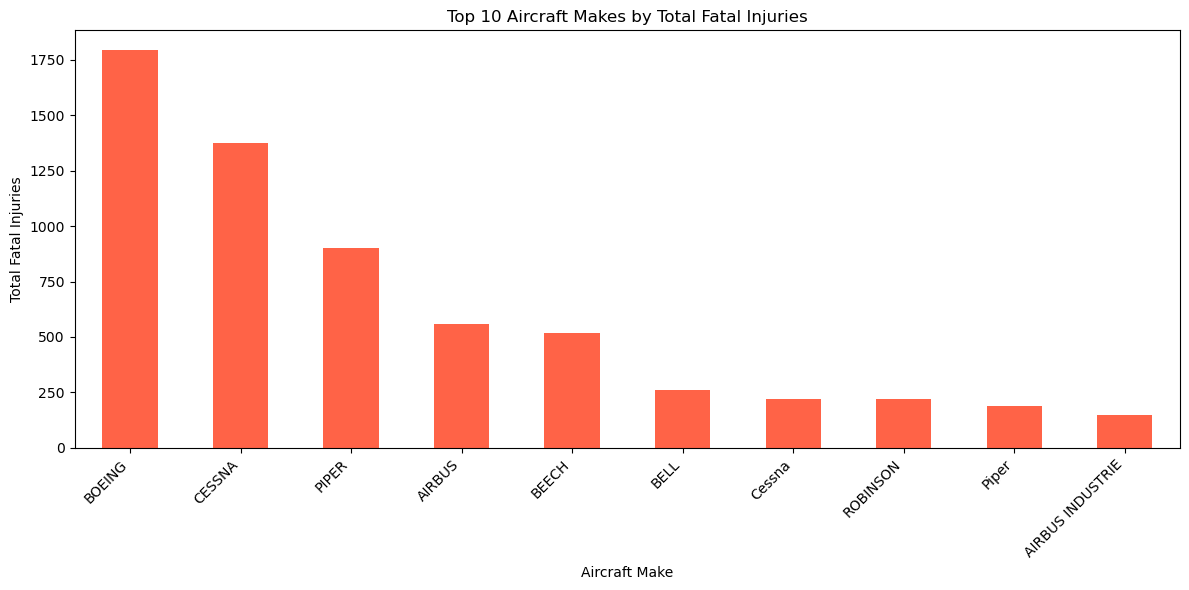

In [73]:
# Ensure 'Make' is treated as a category
df['Make'] = df['Make'].astype('category')

# Group by 'Make' and sum 'Total.Fatal.Injuries', then sort and take top 10
fatal_injuries_by_make = df.groupby('Make', observed= False)['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
fatal_injuries_by_make.plot(kind='bar', color='tomato')

plt.title('Top 10 Aircraft Makes by Total Fatal Injuries')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the bar chart for total fatal injuries against aircraft make shows that the Model with the lowest fatalities is Mooney,Robinson,Ciruss Design corp and Beach in ascending order.

Total Fatal Injuries agaiinst weather condition

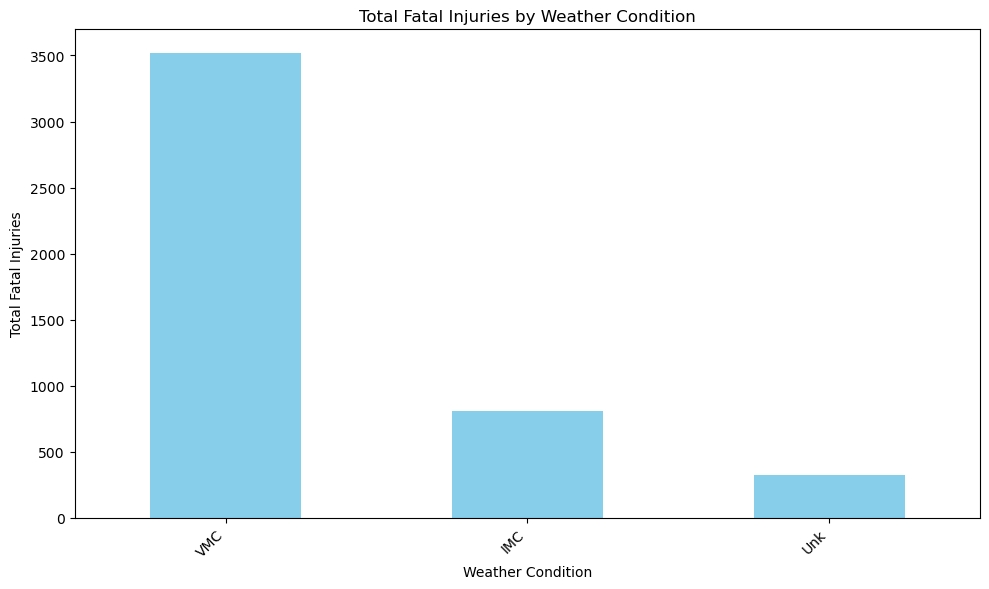

In [74]:
# Total fatal injuries against weather condition.
df['Weather.Condition'] = df['Weather.Condition'].astype('category')

# Group by weather condition and sum fatal injuries
fatal_injuries_by_weather = df.groupby('Weather.Condition', observed= False)['Total.Fatal.Injuries'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
fatal_injuries_by_weather.plot(kind='bar', color='skyblue')

plt.title('Total Fatal Injuries by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Visual Meteorogical conditions(VMC/Clear weather) registered more fataliies as compared to bad weather, a clear indication that it is not about the weather condition and probably the pilots are more vigilant in bad weather than in good weather resulting in the output show. This imply that there is need to train pilots in be more extra vigilant during clear weather.

  Total fatal injuries against event date.

In [75]:
# parse the event date into datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

In [76]:
# Group by date ans sum injuries
fatal_injuries_by_date = (
    df.groupby('Event.Date', observed=False)['Total.Fatal.Injuries']
    .sum()
    .sort_index()
)


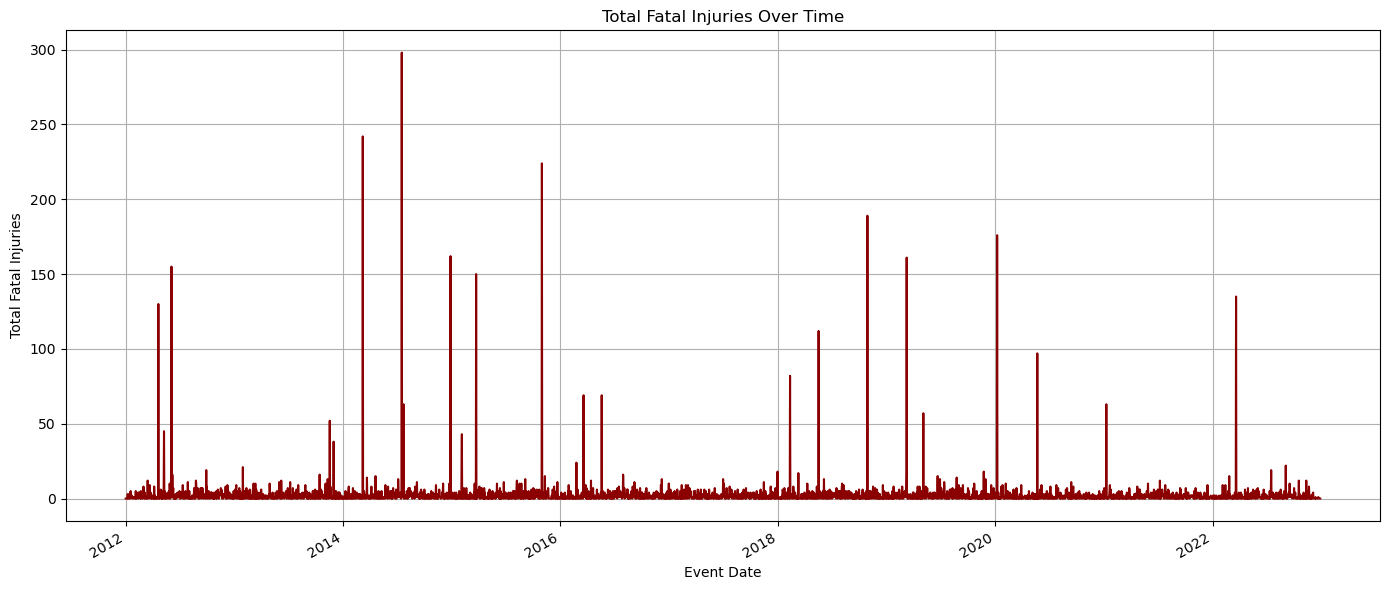

In [77]:
# Plotting the line chart
plt.figure(figsize=(14, 6))
fatal_injuries_by_date.plot(kind='line', color='darkred')

plt.title('Total Fatal Injuries Over Time')
plt.xlabel('Event Date')
plt.ylabel('Total Fatal Injuries')
plt.grid(True)
plt.tight_layout()
plt.show()


The trend analysis for fatalities over time for a selected period between the year 2012 and the year 2022 indicates a decline, which is a good indicator of improvement over time. And therefore venturing into the business is viable and the best make to invest in is moneey since it registered minimal fataliies

#### SUMMARY
In conclusion venturing into Aviation industry can be a very competitive business and capital intensive, however it is recommended to invest in a make that causes minimal fatalies and can operate well in all weather conditions. From the analysis the best make to invest in is Bommey.